In [10]:
import pandas as pd
import seaborn as sns
import FinanceDataReader as fdr

In [11]:
df = pd.read_csv("[IT]삼성전자.csv")
df_columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
df.columns = df_columns
df

,Date,Open,High,Low,Close,Volume
0,20220531,67500,67500,66700,67400,24365002
1,20220530,67500,67800,66900,67700,14255484
2,20220527,66700,66900,66200,66500,11405555
3,20220526,66300,67200,65500,65900,15970890
4,20220525,66700,67100,65900,66400,15150490
...,...,...,...,...,...,...
9876,19850109,126,126,122,123,324837
9877,19850108,129,129,127,127,845098
9878,19850107,129,130,128,129,771895
9879,19850105,129,129,128,128,108497


In [12]:
#시간순으로 정렬(시계열 데이터이므로 일단 시간순으로 정리)
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close,Volume
9880,19850104,130,130,129,129,111765
9879,19850105,129,129,128,128,108497
9878,19850107,129,130,128,129,771895
9877,19850108,129,129,127,127,845098
9876,19850109,126,126,122,123,324837
...,...,...,...,...,...,...
4,20220525,66700,67100,65900,66400,15150490
3,20220526,66300,67200,65500,65900,15970890
2,20220527,66700,66900,66200,66500,11405555
1,20220530,67500,67800,66900,67700,14255484


In [13]:
##날짜 형식 지정해주기위해 str로 변경(원래는 int64로 되어있음)
df['Date']= df['Date'].astype('str')
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

df

,Open,High,Low,Close,Volume
Date,,,,,
1985-01-04,130,130,129,129,111765
1985-01-05,129,129,128,128,108497
1985-01-07,129,130,128,129,771895
1985-01-08,129,129,127,127,845098
1985-01-09,126,126,122,123,324837
...,...,...,...,...,...
2022-05-25,66700,67100,65900,66400,15150490
2022-05-26,66300,67200,65500,65900,15970890
2022-05-27,66700,66900,66200,66500,11405555


In [14]:
# mask = df.index >= '2000-01-01'
# df = df.loc[mask]
# df

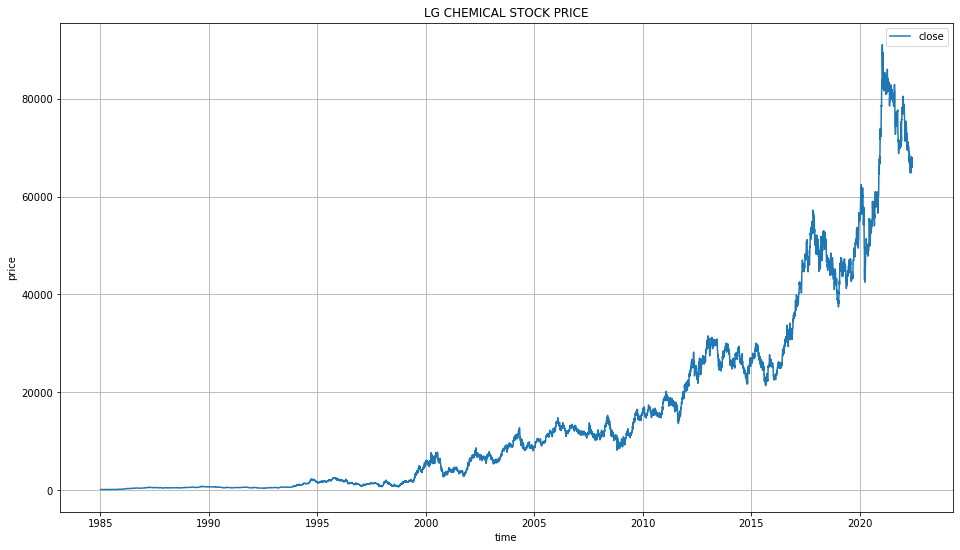

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))

plt.title("LG CHEMICAL STOCK PRICE")
sns.lineplot(y=df['Close'], x=df.index, label = "close")
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9881 entries, 1985-01-04 to 2022-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    9881 non-null   int64
 1   High    9881 non-null   int64
 2   Low     9881 non-null   int64
 3   Close   9881 non-null   int64
 4   Volume  9881 non-null   int64
dtypes: int64(5)
memory usage: 721.2 KB


In [17]:
df[-20:]

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-03,67400,68400,67300,67500,14168875
2022-05-04,68000,68400,67500,67900,11505248
2022-05-06,67000,67100,66500,66500,14356156
2022-05-09,66300,66900,66100,66100,11858736
2022-05-10,65900,66300,65300,65700,17235605
2022-05-11,65500,66300,65200,65700,12330920
2022-05-12,65200,65500,64900,64900,16414188
2022-05-13,65300,66700,65200,66500,14551536
2022-05-16,67100,67400,66100,66300,11937555


In [19]:
from sklearn.preprocessing import MinMaxScaler

# 피처값 스케일링
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df.drop(['Close','Volume'], axis=1))
scaled_df = pd.DataFrame(scaled_df, columns = df.drop(['Close','Volume'], axis=1).columns)

scaler1 = MinMaxScaler()
scaled_df['Close'] = scaler1.fit_transform(df['Close'].values.reshape(-1,1))

scaled_df['Volume'] = scaler.fit_transform(df['Volume'].values.reshape(-1,1))

scaler2 = MinMaxScaler()
check_df = scaler2.fit_transform(df)
check_df = pd.DataFrame(check_df, columns = df.columns)


In [20]:
scaled_df

,Open,High,Low,Close,Volume
0,0.000155,0.000145,0.000157,0.000143,0.000342
1,0.000144,0.000134,0.000145,0.000132,0.000332
2,0.000144,0.000145,0.000145,0.000143,0.002363
3,0.000144,0.000134,0.000134,0.000121,0.002587
4,0.000111,0.000103,0.000078,0.000077,0.000995
...,...,...,...,...,...
9876,0.738313,0.692814,0.735974,0.729325,0.046385
9877,0.733877,0.693848,0.731499,0.723824,0.048897
9878,0.738313,0.690745,0.739330,0.730426,0.034920
9879,0.747184,0.700054,0.747161,0.743629,0.043645


In [21]:
check_df

,Open,High,Low,Close,Volume
0,0.000155,0.000145,0.000157,0.000143,0.000342
1,0.000144,0.000134,0.000145,0.000132,0.000332
2,0.000144,0.000145,0.000145,0.000143,0.002363
3,0.000144,0.000134,0.000134,0.000121,0.002587
4,0.000111,0.000103,0.000078,0.000077,0.000995
...,...,...,...,...,...
9876,0.738313,0.692814,0.735974,0.729325,0.046385
9877,0.733877,0.693848,0.731499,0.723824,0.048897
9878,0.738313,0.690745,0.739330,0.730426,0.034920
9879,0.747184,0.700054,0.747161,0.743629,0.043645


In [22]:
df = scaled_df

In [23]:
window_size = 20

In [24]:
#데이터셋을 만들어 주는 함수

import numpy as np

def make_dataset(feature, label, window_size = 20):
  
  feature_list = []
  label_list = []
  
  for i in range(len(feature) - window_size) :
    feature_list.append(feature.iloc[i:i+window_size])
    label_list.append(label.iloc[i+window_size])
  
  return np.array(feature_list), np.array(label_list)


In [25]:
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
label_cols = ['Close']

train_feature = df[feature_cols]
train_label = df[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label,20)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, shuffle = False)
x_train.shape, x_valid.shape

((7888, 20, 5), (1973, 20, 5))

In [26]:
pred_feature = df[-window_size :]
pred_feature = pred_feature.to_numpy()
pred_feature = pred_feature.reshape((1,20,5))
pred_feature.shape


(1, 20, 5)

In [27]:
pred_feature

array([[[0.74607469, 0.70625957, 0.75163618, 0.74142863, 0.04338004],
        [0.75272776, 0.70625957, 0.75387369, 0.74582985, 0.03522496],
        [0.74163932, 0.6928137 , 0.74268613, 0.7304256 , 0.04395343],
        [0.73387741, 0.69074511, 0.73821111, 0.72602438, 0.03630722],
        [0.72944203, 0.68453932, 0.72926106, 0.72162317, 0.05276927],
        [0.72500665, 0.68453932, 0.72814231, 0.72162317, 0.03775288],
        [0.72168012, 0.67626495, 0.72478604, 0.71282074, 0.05025439],
        [0.72278896, 0.68867651, 0.72814231, 0.7304256 , 0.04455161],
        [0.74274816, 0.69591659, 0.73821111, 0.72822499, 0.03654853],
        [0.73720394, 0.70108808, 0.74380489, 0.74252894, 0.04800793],
        [0.75605429, 0.70936246, 0.75499245, 0.74803046, 0.05047523],
        [0.73609509, 0.69798519, 0.74268613, 0.74142863, 0.05227366],
        [0.75051007, 0.70625957, 0.7561112 , 0.74693015, 0.03707549],
        [0.76159851, 0.71039676, 0.75499245, 0.74582985, 0.04189579],
        [0.74718354,

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import LSTM,Dropout

model = Sequential()

model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu')
          )
model.add(Dense(1))
model.add(Dropout(0.2))

#LSTM의 첫번재 옵션 unit은 output의 차원
#time_steps(window_size)이 train_features.shape[1], features이 train_features.shape[2] 
#예측하고자하는 target의 갯수가 1이므로 마지막에 Dense(1)을 하나 추가
 

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam')
#실제 연속적인 값을 예측하는 것이기 때문에 loss function은 mse
#일반적으로 optimizer은 adam 주로 사용
early_stop = EarlyStopping(monitor='val_loss', patience=10)
#10회 Epoch동안 개선되지 않는다면 종료

import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])


Epoch 1/100
489/493 [============================>.] - ETA: 0s - loss: 0.0025
Epoch 1: val_loss improved from inf to 0.01472, saving model to model\tmp_checkpoint.h5
493/493 [==============================] - 6s 9ms/step - loss: 0.0025 - val_loss: 0.0147
Epoch 2/100
486/493 [============================>.] - ETA: 0s - loss: 0.0025
Epoch 2: val_loss improved from 0.01472 to 0.01405, saving model to model\tmp_checkpoint.h5
493/493 [==============================] - 4s 9ms/step - loss: 0.0025 - val_loss: 0.0141
Epoch 3/100
490/493 [============================>.] - ETA: 0s - loss: 0.0024
Epoch 3: val_loss did not improve from 0.01405
493/493 [==============================] - 4s 8ms/step - loss: 0.0024 - val_loss: 0.0142
Epoch 4/100
491/493 [============================>.] - ETA: 0s - loss: 0.0026
Epoch 4: val_loss improved from 0.01405 to 0.01246, saving model to model\tmp_checkpoint.h5
493/493 [==============================] - 4s 8ms/step - loss: 0.0026 - val_loss: 0.0125
Epoch 5/100
4

In [30]:
model.load_weights(filename)

pred = model.predict(pred_feature)

pred

1/1 [==============================] - 0s 326ms/step


array([[0.59087604]], dtype=float32)

In [31]:
pred_feature

array([[[0.74607469, 0.70625957, 0.75163618, 0.74142863, 0.04338004],
        [0.75272776, 0.70625957, 0.75387369, 0.74582985, 0.03522496],
        [0.74163932, 0.6928137 , 0.74268613, 0.7304256 , 0.04395343],
        [0.73387741, 0.69074511, 0.73821111, 0.72602438, 0.03630722],
        [0.72944203, 0.68453932, 0.72926106, 0.72162317, 0.05276927],
        [0.72500665, 0.68453932, 0.72814231, 0.72162317, 0.03775288],
        [0.72168012, 0.67626495, 0.72478604, 0.71282074, 0.05025439],
        [0.72278896, 0.68867651, 0.72814231, 0.7304256 , 0.04455161],
        [0.74274816, 0.69591659, 0.73821111, 0.72822499, 0.03654853],
        [0.73720394, 0.70108808, 0.74380489, 0.74252894, 0.04800793],
        [0.75605429, 0.70936246, 0.75499245, 0.74803046, 0.05047523],
        [0.73609509, 0.69798519, 0.74268613, 0.74142863, 0.05227366],
        [0.75051007, 0.70625957, 0.7561112 , 0.74693015, 0.03707549],
        [0.76159851, 0.71039676, 0.75499245, 0.74582985, 0.04189579],
        [0.74718354,

In [32]:
res = scaler2.inverse_transform(np.array(pred_feature).reshape(-1,5))
res = pd.DataFrame(res)
res.columns = df.columns
res

,Open,High,Low,Close,Volume
0,67400.0,68400.0,67300.0,67500.0,14168875.0
1,68000.0,68400.0,67500.0,67900.0,11505248.0
2,67000.0,67100.0,66500.0,66500.0,14356156.0
3,66300.0,66900.0,66100.0,66100.0,11858736.0
4,65900.0,66300.0,65300.0,65700.0,17235605.0
5,65500.0,66300.0,65200.0,65700.0,12330920.0
6,65200.0,65500.0,64900.0,64900.0,16414188.0
7,65300.0,66700.0,65200.0,66500.0,14551536.0
8,67100.0,67400.0,66100.0,66300.0,11937555.0
9,66600.0,67900.0,66600.0,67600.0,15680447.0


In [33]:
df[-20:]

,Open,High,Low,Close,Volume
9861,0.746075,0.706260,0.751636,0.741429,0.043380
9862,0.752728,0.706260,0.753874,0.745830,0.035225
9863,0.741639,0.692814,0.742686,0.730426,0.043953
9864,0.733877,0.690745,0.738211,0.726024,0.036307
9865,0.729442,0.684539,0.729261,0.721623,0.052769
9866,0.725007,0.684539,0.728142,0.721623,0.037753
9867,0.721680,0.676265,0.724786,0.712821,0.050254
9868,0.722789,0.688677,0.728142,0.730426,0.044552
9869,0.742748,0.695917,0.738211,0.728225,0.036549
9870,0.737204,0.701088,0.743805,0.742529,0.048008


In [34]:
2.421669e+08

242166900.0

In [35]:
rescaled_pred = scaler1.inverse_transform(np.array(pred).reshape(-1,1))
rescaled_pred

array([[53817.18]], dtype=float32)